In [215]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import NearMiss
from numpy import where
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [245]:
# Read Data Pokemon
df = pd.read_csv('pokemon_data.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,name,generation,classfication,abilities,height_m,weight_kg,type1,type2,is_legendary,is_mythical,is_mega
0,0,0,Bulbasaur,1.0,Seed Pokemon,"['Overgrow', 'Chlorophyll']",0.7,6.9,Grass,Poison,0.0,0.0,0.0
1,1,1,Ivysaur,1.0,Seed Pokemon,"['Overgrow', 'Chlorophyll']",1.0,13.0,Grass,Poison,0.0,0.0,0.0
2,2,2,Venusaur,1.0,Seed Pokemon,"['Overgrow', 'Chlorophyll']",2.0,100.0,Grass,Poison,0.0,0.0,0.0
3,3,3,Mega Venusaur,1.0,Seed Pokemon,['Thick Fat'],2.4,155.5,Grass,Poison,0.0,0.0,1.0
4,4,4,Charmander,1.0,Lizard Pokemon,"['Blaze', 'Solar Power']",0.6,8.5,Fire,None,0.0,0.0,0.0


## Data awal

In [246]:
# Set X and y to array
X = df[['height_m','weight_kg']]
y = df['is_mythical']

In [247]:
display(X)
display(y)

,height_m,weight_kg
0,0.7,6.9
1,1.0,13.0
2,2.0,100.0
3,2.4,155.5
4,0.6,8.5
...,...,...
1016,2.1,200.0
1017,2.2,208.0
1018,2.0,44.5
1019,1.1,7.7


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1016    0.0
1017    0.0
1018    0.0
1019    0.0
1020    0.0
Name: is_mythical, Length: 1021, dtype: float64

In [ ]:
# count counter
counter_target = Counter(y)
print(counter_target)

Counter({0.0: 991, 1.0: 30})


Data Visualization

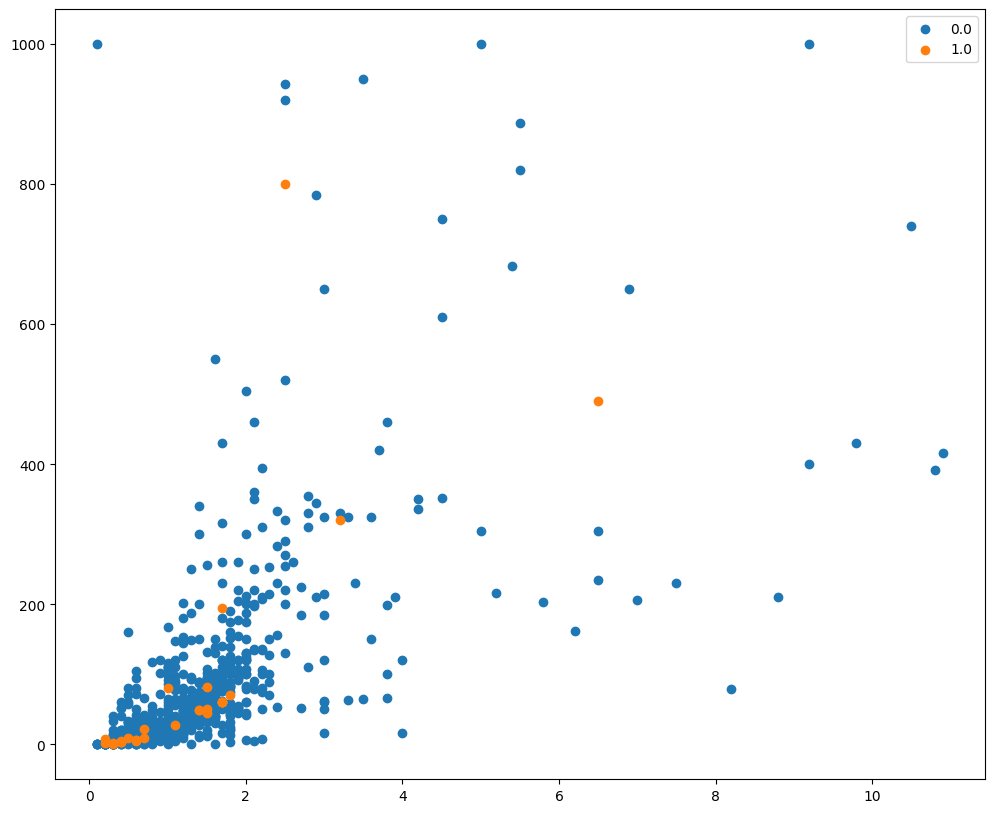

In [249]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter_target.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X["height_m"][row_ix], 
                   X["weight_kg"][row_ix], label=str(label))
    pyplot.legend()
pyplot.show()

## Oversample

### SMOTE

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [251]:
# transform the dataset
smote = SMOTE()

# fit and apply the transform
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [252]:
# summarize the new class distribution
counter_y_smote = Counter(y_smote)
print(counter_y_smote)

Counter({0.0: 792, 1.0: 792})


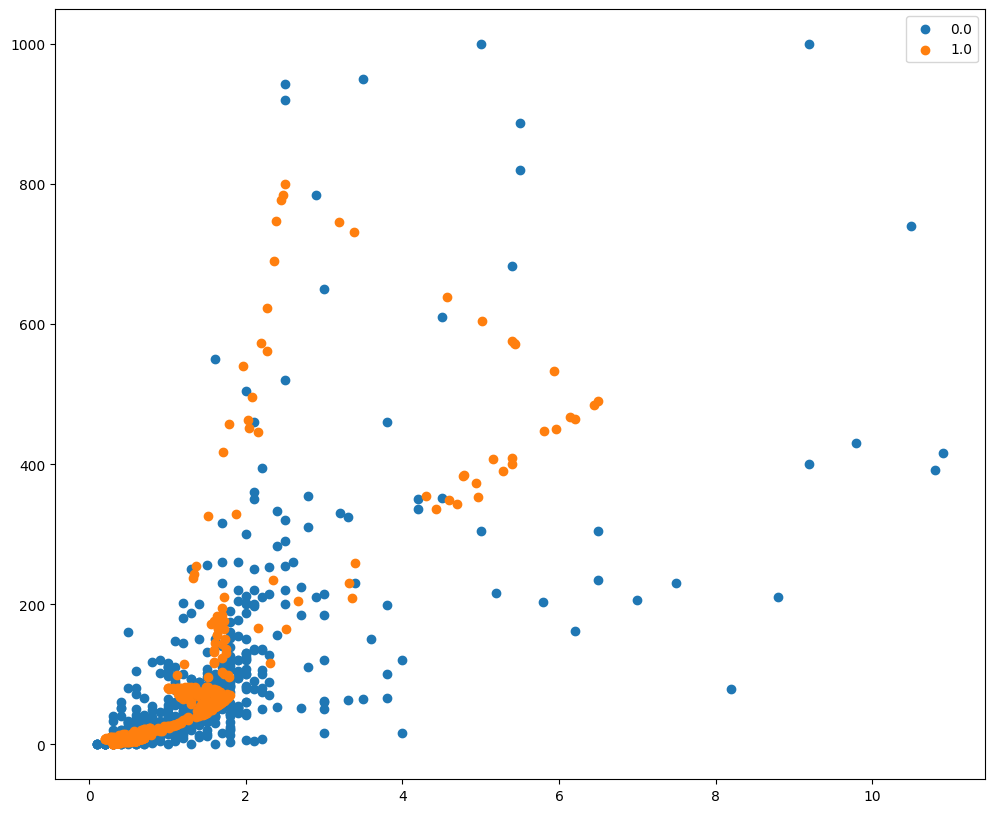

In [253]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_smote.items():
    row_ix = where(y_smote == label)[0]
    pyplot.scatter(X_smote["height_m"][row_ix], X_smote["weight_kg"][row_ix], label=str(label))
    pyplot.legend()
pyplot.show()

### SVMSMOTE

In [254]:
# transform the dataset
svm_smote = SVMSMOTE()

# fit and apply the transform
X_svm, y_svm = svm_smote.fit_resample(X_train, y_train)

In [255]:
# summarize the new class distribution
counter_y_svm = Counter(y_svm)
print(counter_y_svm)

Counter({0.0: 792, 1.0: 347})


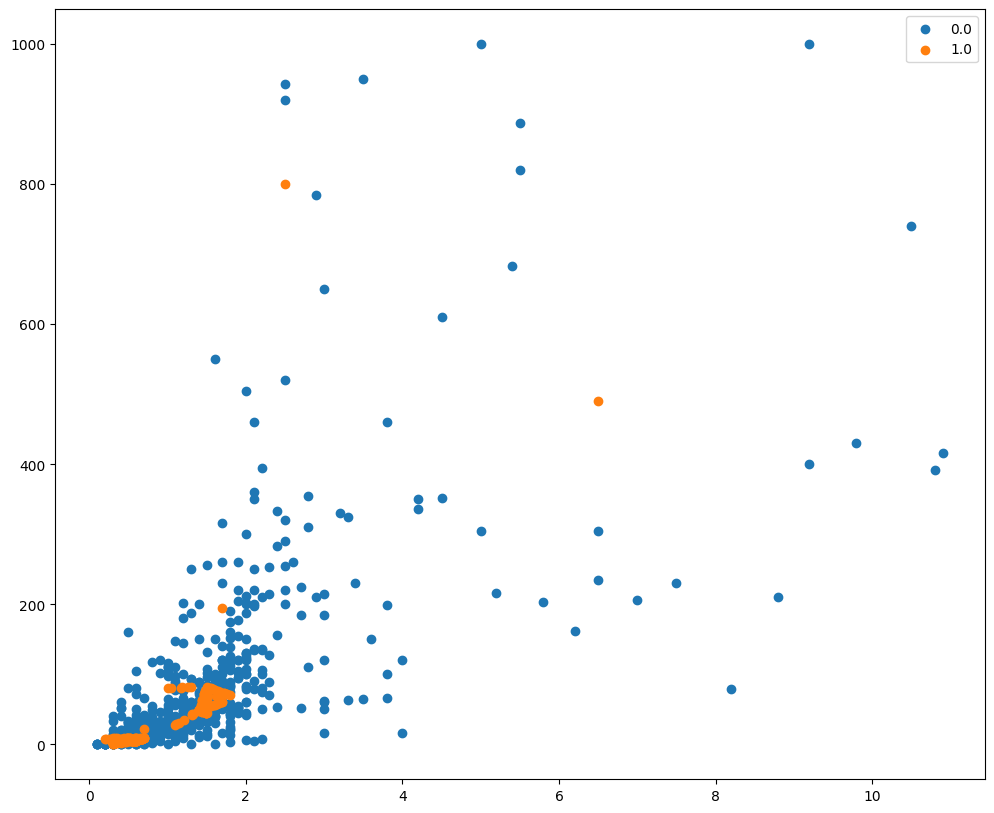

In [256]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_svm.items():
    row_ix = where(y_svm == label)[0]
    pyplot.scatter(X_svm["height_m"][row_ix], X_svm["weight_kg"][row_ix], label=str(label))
    pyplot.legend()
pyplot.show()

# Classification before oversample

In [257]:
mlp_classifier_relu = MLPClassifier(solver='sgd', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50), max_iter=150, 
                           learning_rate_init=0.2, activation='relu')
mlp_classifier_relu.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=50, learning_rate_init=0.2,
              max_iter=150, random_state=42, solver='sgd')

In [258]:
mlp_classifier_logistic = MLPClassifier(solver='sgd', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50), max_iter=150, 
                           learning_rate_init=0.2, activation='logistic')
mlp_classifier_logistic.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=50,
              learning_rate_init=0.2, max_iter=150, random_state=42,
              solver='sgd')

In [259]:
y_pred_relu = mlp_classifier_relu.predict(X_test)
y_pred_relu

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [260]:
y_pred_logi = mlp_classifier_logistic.predict(X_test)
y_pred_logi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [261]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

print("Activation = Relu")
print(classification_report(y_test, y_pred_relu, zero_division=0))
print('F1 Macro Average:', f1_score(y_test, y_pred_relu, average='macro'))
print('F1 Micro Average:', f1_score(y_test, y_pred_relu, average='micro'))
print('Precision Macro Average:', precision_score(y_test, y_pred_relu, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, y_pred_relu, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, y_pred_relu, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, y_pred_relu, average='micro',zero_division=0))

Activation = Relu
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       199
         1.0       0.00      0.00      0.00         6

    accuracy                           0.97       205
   macro avg       0.49      0.50      0.49       205
weighted avg       0.94      0.97      0.96       205

F1 Macro Average: 0.49257425742574257
F1 Micro Average: 0.9707317073170731
Precision Macro Average: 0.4853658536585366
Precision Micro Average: 0.9707317073170731
Recall Macro Average: 0.5
Recall Micro Average: 0.9707317073170731


In [262]:
print("Activation = Logistic")
print(classification_report(y_test, y_pred_logi, zero_division=0))
print('F1 Macro Average:', f1_score(y_test, y_pred_logi, average='macro'))
print('F1 Micro Average:', f1_score(y_test, y_pred_logi, average='micro'))
print('Precision Macro Average:', precision_score(y_test, y_pred_logi, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, y_pred_logi, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, y_pred_logi, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, y_pred_logi, average='micro',zero_division=0))

Activation = Logistic
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       199
         1.0       0.00      0.00      0.00         6

    accuracy                           0.97       205
   macro avg       0.49      0.50      0.49       205
weighted avg       0.94      0.97      0.96       205

F1 Macro Average: 0.49257425742574257
F1 Micro Average: 0.9707317073170731
Precision Macro Average: 0.4853658536585366
Precision Micro Average: 0.9707317073170731
Recall Macro Average: 0.5
Recall Micro Average: 0.9707317073170731


# Classification after oversample

In [263]:
from sklearn.model_selection import cross_validate

def stratified_cv(X, y, cv, model):
    _scoring = ['accuracy', 'recall_macro', 'f1_macro', 'roc_auc']
    result = cross_validate(estimator=model, X=X, y=y, cv=cv, scoring=_scoring, return_train_score=True)
    print("Average Accuracy :", np.average(result['test_accuracy']))
    print("Average Recall :", np.average(result['test_recall_macro']))
    print("Average F1 :", np.average(result['test_f1_macro']))
    print("Average ROC AUC :", np.average(result['test_roc_auc']))

In [264]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)

print("Activation = Relu")
stratified_cv(X_svm, y_svm, cv, mlp_classifier_relu)
print("Activation = Logistic")
stratified_cv(X_svm, y_svm, cv, mlp_classifier_logistic)

Activation = Relu
Average Accuracy : 0.6953473993353427
Average Recall : 0.5
Average F1 : 0.4101495772974264
Average ROC AUC : 0.519413389367959
Activation = Logistic
Average Accuracy : 0.7709019244145606
Average Recall : 0.7098312384631322
Average F1 : 0.7143475373511128
Average ROC AUC : 0.7142954357888783


In [265]:
mlp_classifier_relu.fit(X_svm,y_svm)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=50, learning_rate_init=0.2,
              max_iter=150, random_state=42, solver='sgd')

In [266]:
mlp_classifier_logistic.fit(X_svm,y_svm)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=50,
              learning_rate_init=0.2, max_iter=150, random_state=42,
              solver='sgd')

In [267]:
y_pred_relu_2 = mlp_classifier_relu.predict(X_test)
y_pred_relu_2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [268]:
y_pred_logi_2 = mlp_classifier_logistic.predict(X_test)
y_pred_logi_2

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [269]:
print("Activation = Relu")
print(classification_report(y_test, y_pred_relu_2, zero_division=0))
print('F1 Macro Average:', f1_score(y_test, y_pred_relu_2, average='macro'))
print('F1 Micro Average:', f1_score(y_test, y_pred_relu_2, average='micro'))
print('Precision Macro Average:', precision_score(y_test, y_pred_relu_2, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, y_pred_relu_2, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, y_pred_relu_2, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, y_pred_relu_2, average='micro',zero_division=0))

Activation = Relu
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       199
         1.0       0.00      0.00      0.00         6

    accuracy                           0.97       205
   macro avg       0.49      0.50      0.49       205
weighted avg       0.94      0.97      0.96       205

F1 Macro Average: 0.49257425742574257
F1 Micro Average: 0.9707317073170731
Precision Macro Average: 0.4853658536585366
Precision Micro Average: 0.9707317073170731
Recall Macro Average: 0.5
Recall Micro Average: 0.9707317073170731


In [270]:
print("Activation = Logistic")
print(classification_report(y_test, y_pred_logi_2, zero_division=0))
print('F1 Macro Average:', f1_score(y_test, y_pred_logi_2, average='macro'))
print('F1 Micro Average:', f1_score(y_test, y_pred_logi_2, average='micro'))
print('Precision Macro Average:', precision_score(y_test, y_pred_logi_2, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, y_pred_logi_2, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, y_pred_logi_2, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, y_pred_logi_2, average='micro',zero_division=0))

Activation = Logistic
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93       199
         1.0       0.04      0.17      0.07         6

    accuracy                           0.87       205
   macro avg       0.51      0.53      0.50       205
weighted avg       0.95      0.87      0.90       205

F1 Macro Average: 0.49904968775454794
F1 Micro Average: 0.8682926829268293
Precision Macro Average: 0.5080028666985189
Precision Micro Average: 0.8682926829268293
Recall Macro Average: 0.5280569514237856
Recall Micro Average: 0.8682926829268293


Hasil MLPClassifier tanpa oversample untuk activation function relu dan activation function logistic menghasilkan score yang sama, tetapi untuk MLPClassifier dengan oversample, terdapat perbedaan untuk activation function logistic dan relu, dimana hasil activation function relu mendapatkan score yang lebih besar dibandingkan activation function logistic. Dengan ini saya menyimpulkan activation function relu (Sigmoid) lebih baik dari pada activation function logistic (Sigmoid) untuk data ini.

## Undersample

In [271]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### Random Undersampling

In [272]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_undersample, y_undersample = undersample.fit_resample(X_train_2, y_train_2)

In [273]:
# summarize class distribution
counter_y_undersample = Counter(y_undersample)
print(counter_y_undersample)

Counter({0.0: 22, 1.0: 22})


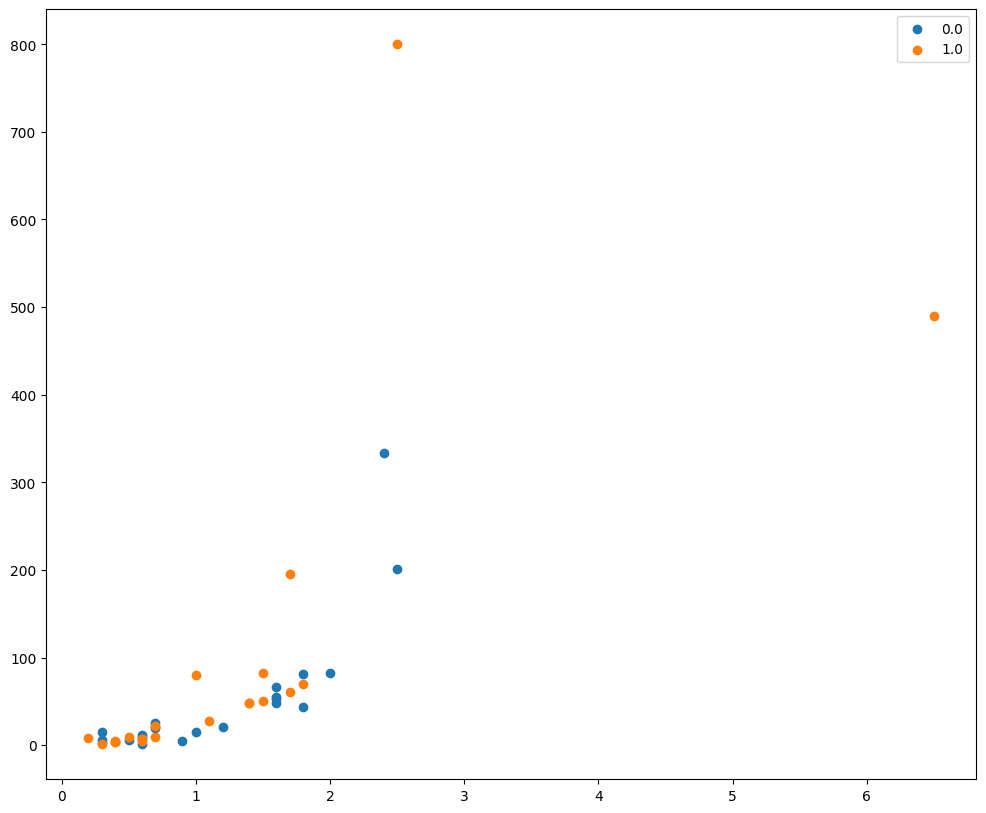

In [274]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_svm.items():
    row_ix = where(y_undersample == label)[0]
    pyplot.scatter(X_undersample["height_m"][row_ix], X_undersample["weight_kg"][row_ix], label=str(label))
    pyplot.legend()
pyplot.show()

### NearMiss

In [275]:
# define undersample strategy
nearmiss = NearMiss(version=2)

# fit and apply the transform
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X_train_2, y_train_2)

In [276]:
# summarize class distribution
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)

Counter({0.0: 22, 1.0: 22})


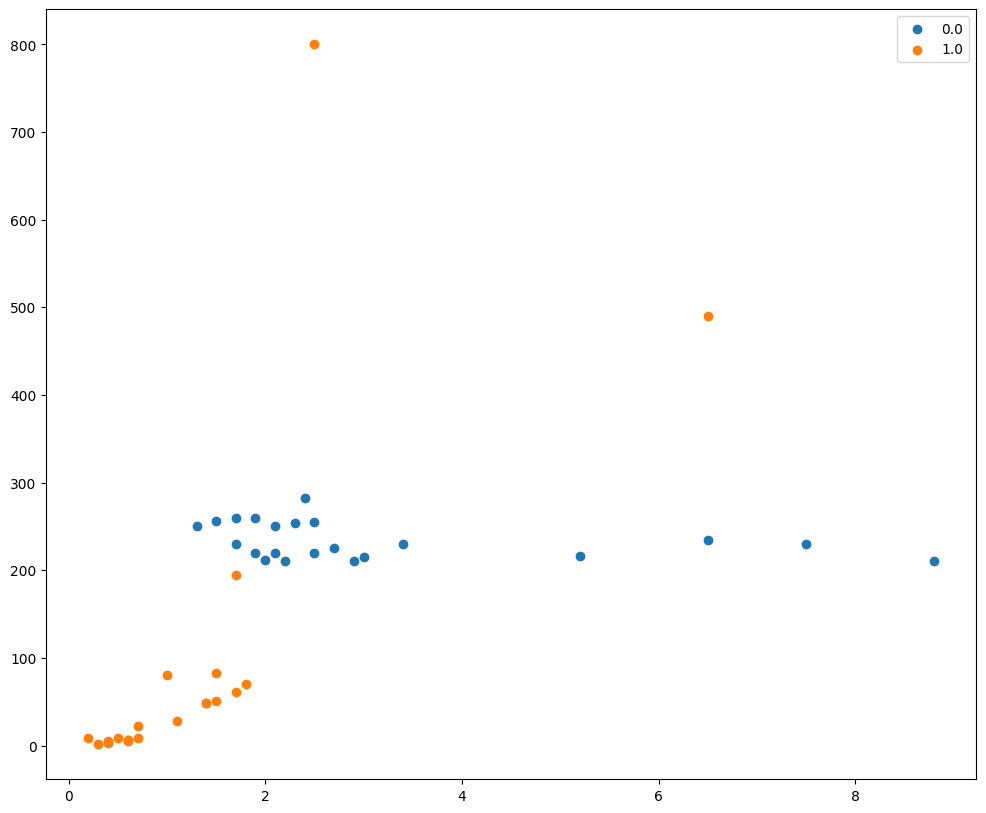

In [277]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_svm.items():
    row_ix = where(y_nearmiss == label)[0]
    pyplot.scatter(X_nearmiss["height_m"][row_ix], X_nearmiss["weight_kg"][row_ix], label=str(label))
    pyplot.legend()
pyplot.show()

# Classification before undersampling

In [278]:
mlp_classifier_undersample_relu = MLPClassifier(solver='sgd', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50), max_iter=150, 
                           learning_rate_init=0.2, activation='relu')
mlp_classifier_undersample_relu.fit(X_train_2, y_train_2)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=50, learning_rate_init=0.2,
              max_iter=150, random_state=42, solver='sgd')

In [279]:
mlp_classifier_undersample_logistic = MLPClassifier(solver='sgd', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(50), max_iter=150, 
                           learning_rate_init=0.2, activation='logistic')
mlp_classifier_undersample_logistic.fit(X_train_2, y_train_2)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=50,
              learning_rate_init=0.2, max_iter=150, random_state=42,
              solver='sgd')

In [280]:
y_pred_under_relu = mlp_classifier_undersample_relu.predict(X_test_2)
y_pred_under_relu

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [281]:
y_pred_under_logi = mlp_classifier_undersample_logistic.predict(X_test_2)
y_pred_under_logi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [282]:
print("Activation = Relu")
print(classification_report(y_test_2, y_pred_under_relu, zero_division=0))
print('F1 Macro Average:', f1_score(y_test_2, y_pred_under_relu, average='macro'))
print('F1 Micro Average:', f1_score(y_test_2, y_pred_under_relu, average='micro'))
print('Precision Macro Average:', precision_score(y_test_2, y_pred_under_relu, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test_2, y_pred_under_relu, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test_2, y_pred_under_relu, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test_2, y_pred_under_relu, average='micro',zero_division=0))

Activation = Relu
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       248
         1.0       0.00      0.00      0.00         8

    accuracy                           0.97       256
   macro avg       0.48      0.50      0.49       256
weighted avg       0.94      0.97      0.95       256

F1 Macro Average: 0.49206349206349204
F1 Micro Average: 0.96875
Precision Macro Average: 0.484375
Precision Micro Average: 0.96875
Recall Macro Average: 0.5
Recall Micro Average: 0.96875


In [283]:
print("Activation = Logistic")
print(classification_report(y_test_2, y_pred_under_logi, zero_division=0))
print('F1 Macro Average:', f1_score(y_test_2, y_pred_under_logi, average='macro'))
print('F1 Micro Average:', f1_score(y_test_2, y_pred_under_logi, average='micro'))
print('Precision Macro Average:', precision_score(y_test_2, y_pred_under_logi, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test_2, y_pred_under_logi, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test_2, y_pred_under_logi, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test_2, y_pred_under_logi, average='micro',zero_division=0))

Activation = Logistic
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       248
         1.0       0.00      0.00      0.00         8

    accuracy                           0.97       256
   macro avg       0.48      0.50      0.49       256
weighted avg       0.94      0.97      0.95       256

F1 Macro Average: 0.49206349206349204
F1 Micro Average: 0.96875
Precision Macro Average: 0.484375
Precision Micro Average: 0.96875
Recall Macro Average: 0.5
Recall Micro Average: 0.96875


# Classification after undersampling

In [284]:
print("Activation = Relu")
stratified_cv(X_nearmiss, y_nearmiss, cv, mlp_classifier_undersample_relu)
print("Activation = Logistic")
stratified_cv(X_nearmiss, y_nearmiss, cv, mlp_classifier_undersample_logistic)

Activation = Relu
Average Accuracy : 0.45555555555555555
Average Recall : 0.5
Average F1 : 0.31282051282051276
Average ROC AUC : 0.48
Activation = Logistic
Average Accuracy : 0.5
Average Recall : 0.5
Average F1 : 0.3326007326007326
Average ROC AUC : 0.5900000000000001


In [285]:
mlp_classifier_undersample_relu.fit(X_nearmiss,y_nearmiss)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=50, learning_rate_init=0.2,
              max_iter=150, random_state=42, solver='sgd')

In [286]:
mlp_classifier_undersample_logistic.fit(X_nearmiss,y_nearmiss)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=50,
              learning_rate_init=0.2, max_iter=150, random_state=42,
              solver='sgd')

In [287]:
y_pred_under_relu_2 = mlp_classifier_undersample_relu.predict(X_test_2)
y_pred_under_relu_2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [288]:
y_pred_under_logi_2 = mlp_classifier_undersample_logistic.predict(X_test_2)
y_pred_under_logi_2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [289]:
print("Activation = Relu")
print(classification_report(y_test_2, y_pred_under_relu_2, zero_division=0))
print('F1 Macro Average:', f1_score(y_test_2, y_pred_under_relu_2, average='macro'))
print('F1 Micro Average:', f1_score(y_test_2, y_pred_under_relu_2, average='micro'))
print('Precision Macro Average:', precision_score(y_test_2, y_pred_under_relu_2, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test_2, y_pred_under_relu_2, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test_2, y_pred_under_relu_2, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test_2, y_pred_under_relu_2, average='micro',zero_division=0))

Activation = Relu
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       248
         1.0       0.00      0.00      0.00         8

    accuracy                           0.97       256
   macro avg       0.48      0.50      0.49       256
weighted avg       0.94      0.97      0.95       256

F1 Macro Average: 0.49206349206349204
F1 Micro Average: 0.96875
Precision Macro Average: 0.484375
Precision Micro Average: 0.96875
Recall Macro Average: 0.5
Recall Micro Average: 0.96875


In [290]:
print("Activation = Logistic")
print(classification_report(y_test_2, y_pred_under_logi_2, zero_division=0))
print('F1 Macro Average:', f1_score(y_test_2, y_pred_under_logi_2, average='macro'))
print('F1 Micro Average:', f1_score(y_test_2, y_pred_under_logi_2, average='micro'))
print('Precision Macro Average:', precision_score(y_test_2, y_pred_under_logi_2, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test_2, y_pred_under_logi_2, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test_2, y_pred_under_logi_2, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test_2, y_pred_under_logi_2, average='micro',zero_division=0))

Activation = Logistic
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       248
         1.0       0.00      0.00      0.00         8

    accuracy                           0.95       256
   macro avg       0.48      0.49      0.49       256
weighted avg       0.94      0.95      0.94       256

F1 Macro Average: 0.48697394789579157
F1 Micro Average: 0.94921875
Precision Macro Average: 0.48406374501992033
Precision Micro Average: 0.94921875
Recall Macro Average: 0.4899193548387097
Recall Micro Average: 0.94921875


Hasil MLPClassifier tanpa undersample untuk activation function relu dan activation function logistic menghasilkan score yang sama, tetapi untuk MLPClassifier dengan undersample, terdapat perbedaan untuk activation function logistic dan relu, dimana hasil activation function relu mendapatkan score yang lebih besar dibandingkan activation function logistic. Dengan ini saya menyimpulkan activation function relu (Sigmoid) lebih baik dari pada activation function logistic (Sigmoid) untuk data ini.